以下を実施

In [ ]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# digits.csv のアップロード

In [ ]:
cd data

[Errno 2] No such file or directory: 'data'
/content/data


※ matplotlib日本語化のためのライブラリのインストール

▶ 以下を実行してください。

In [ ]:
!pip install japanize-matplotlib

データ分析対象データ（一部抜粋）

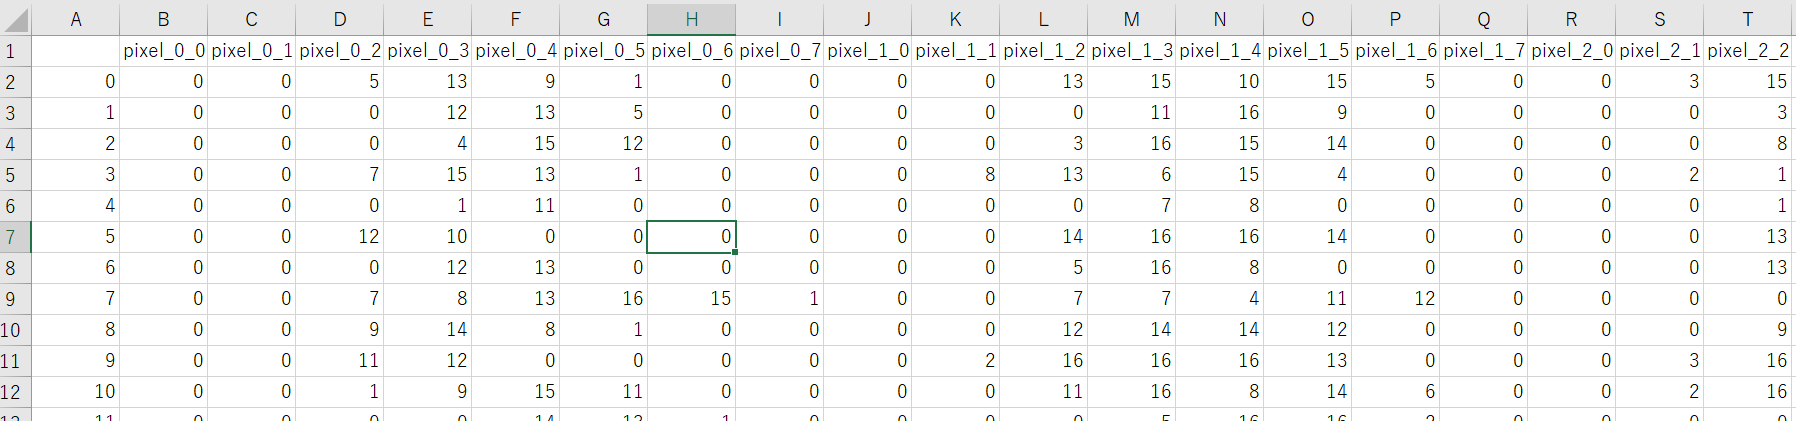

正解データ：target

特徴量データ：pixel_0_0　・・・　pixel_7_7

本データのデータ分析において使用する各種ライブラリをインポートする。


また、グラフ表示が同一タブ上に表示する。

In [ ]:
import pandas as pd
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import japanize_matplotlib 

CSVデータ digits.csvを読み込む

In [ ]:
df = pd.read_csv('digits.csv')

読み込んだCSVファイルの先頭５行と末尾５行を表示。

In [ ]:
df.head(5)

,Unnamed: 0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0,0,5,13,9,1,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,1,0,0,0,12,13,5,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,2,0,0,0,4,15,12,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,3,0,0,7,15,13,1,0,0,0,...,0,0,0,7,13,13,9,0,0,3
4,4,0,0,0,1,11,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [ ]:
df.tail(5)

,Unnamed: 0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1792,1792,0,0,4,10,13,6,0,0,0,...,0,0,0,2,14,15,9,0,0,9
1793,1793,0,0,6,16,13,11,1,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,1794,0,0,1,11,15,1,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,1795,0,0,2,10,7,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9
1796,1796,0,0,10,14,8,1,0,0,0,...,0,0,1,8,12,14,12,1,0,8


In [ ]:
#余分な列を取り除く
df = df.drop('Unnamed: 0',axis = 1)
#取り除かれた確認する
df.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


余分な列が取り除かれたことを確認。次に進む。

In [ ]:
#正解データにどのような種類のデータがあるのか事前に調べる
df['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

10種類のデータがあることを確認した。

欠損値の処理に進む。

In [ ]:
#欠損値を確認する
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

欠損値がないことを確認した。

次は、特徴量と正解データの取り出しをする。

In [ ]:
#特徴量 x と正解データ t に分割する

#特徴量の取り出し
x = df.loc[:, 'pixel_0_0': 'pixel_7_7'] 
#正解ラベルの取り出し
t = df['target'] 

#特徴量がちゃんと分割されているか、先頭３行を出力して確認する
x.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
2,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0


In [ ]:
#訓練データとテストデータに分割する
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

x_train.shape #x_trainのサイズ確認

(1437, 64)

In [ ]:
#モデルの作成と学習

#モデル作成
model = tree.DecisionTreeClassifier(max_depth = 5, random_state= 0 )
#学習
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
#決定木モデルの正解率を計算する
model.score(X = x_test, y = y_test)

0.7305555555555555

In [ ]:
#learn関数を定義する

#x:特徴量 t:正解データ depth:木の深さ
def learn(x, t, depth = 3):
  x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

  model = tree.DecisionTreeClassifier(max_depth = depth, random_state = 0)
  model.fit(x_train, y_train)

  score = model.score(X = x_train, y = y_train)
  score2 = model.score(X = x_test, y = y_test)
  return round(score, 3), round(score2, 3), model

In [ ]:
#木の深さによる正解率の変化を確認
for j in range(1,15): #jは木の深さ（1～14が入る）

#xは特徴量、tは正解データ
    train_score, test_score, model = learn(x, t, depth = j)
    sentence = '訓練データの正解率{}'
    sentence2 = 'テストデータの正解率{}'
    total_sentence = '深さ{}：' + sentence + sentence2
    print(total_sentence.format(j, train_score, test_score))

深さ1：訓練データの正解率0.209テストデータの正解率0.156
深さ2：訓練データの正解率0.333テストデータの正解率0.261
深さ3：訓練データの正解率0.491テストデータの正解率0.425
深さ4：訓練データの正解率0.711テストデータの正解率0.628
深さ5：訓練データの正解率0.795テストデータの正解率0.731
深さ6：訓練データの正解率0.867テストデータの正解率0.792
深さ7：訓練データの正解率0.923テストデータの正解率0.833
深さ8：訓練データの正解率0.952テストデータの正解率0.844
深さ9：訓練データの正解率0.976テストデータの正解率0.85
深さ10：訓練データの正解率0.99テストデータの正解率0.864
深さ11：訓練データの正解率0.996テストデータの正解率0.864
深さ12：訓練データの正解率0.999テストデータの正解率0.842
深さ13：訓練データの正解率1.0テストデータの正解率0.847
深さ14：訓練データの正解率1.0テストデータの正解率0.847


上の結果を確認すると、深さ10までは正解率が上がるが、それ以上深くなると正解率が下がっているため、深さ11以降は過学習が発生していると考える。

質的データがないため、ダミー変数化の処理は必要なし

In [ ]:
#木の深さを10に指定して改めて学習をする
#木の深さが11以上になると「過学習」となってしまうため

s1, s2, model = learn(x, t, depth = 10)
model.score(X = x_test, y = y_test)

0.8638888888888889

決定係数が上がったので採用。

In [ ]:
#モデルの保存
#picleライブラリをインポート
import pickle
with open('digits.pkl', 'wb') as f:
  pickle.dump(model, f)


ランダムフォレストも検証してみる

In [ ]:
#欠損値、質的データはないためとばす
#ランダムフォレストも外れ値の影響をほとんど受けないため、外れ値処理はなし

#ランダムフォレストのインポート
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)
model2 = RandomForestClassifier(n_estimators = 200, random_state = 0) #n_estimatorsは作成する決定木の数

In [ ]:
#モデルの学習
model2.fit(x_train, y_train)

print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))

1.0
0.9722222222222222


ランダムフォレストの方が単純な決定木分類よりも決定係数が高くなったので、ランダムフォレストを採用

In [ ]:
#特徴量の重要度も確認してみます
importance = model2.feature_importances_ #特徴量重要度
#列との対応がわかりやすいようにシリーズ変換
pd.Series(importance, index = x_train.columns).sort_values(ascending = False) #降順に並べ替え

pixel_2_5    0.048280
pixel_3_2    0.044780
pixel_5_3    0.044154
pixel_4_4    0.041175
pixel_5_2    0.036234
               ...   
pixel_5_0    0.000021
pixel_2_0    0.000016
pixel_0_0    0.000000
pixel_4_7    0.000000
pixel_4_0    0.000000
Length: 64, dtype: float64

pixel_2_5が重要なようです。

さらにアダブーストも実装してみることにする

In [ ]:
from pandas.core.common import random_state
#アダブーストのインポート
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state = 0)

#最大の深さ10の決定木を何個も作っていく
base_model = DecisionTreeClassifier(random_state = 0, max_depth = 10)

#決定木を500個作成
model3 = AdaBoostClassifier(n_estimators = 500, random_state = 0, base_estimator=base_model)
model3.fit(x_train, y_train) #学習

print(model3.score(x_train, y_train)) #訓練データの正解率
print(model3.score(x_test, y_test)) #テストデータの正解率

1.0
0.9888888888888889


もっとも高い決定係数を出せたので採用

In [ ]:
#モデルの保存
import pickle
with open('digits2.pkl', 'wb')as f:
  pickle.dump(model3, f)